In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Исследование датасета

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Исследование экспертной оценки

df['Class'].unique()

array([0, 1], dtype=int64)

In [4]:
# Кол-во аномалий по экспертной оценке в процентах

round((df['Class'].value_counts() / df.shape[0]) * 100, 2)

0    99.83
1     0.17
Name: Class, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
X_df = df.drop(['Class'], axis = 1)
y_df = df['Class']

# Распределение переменных

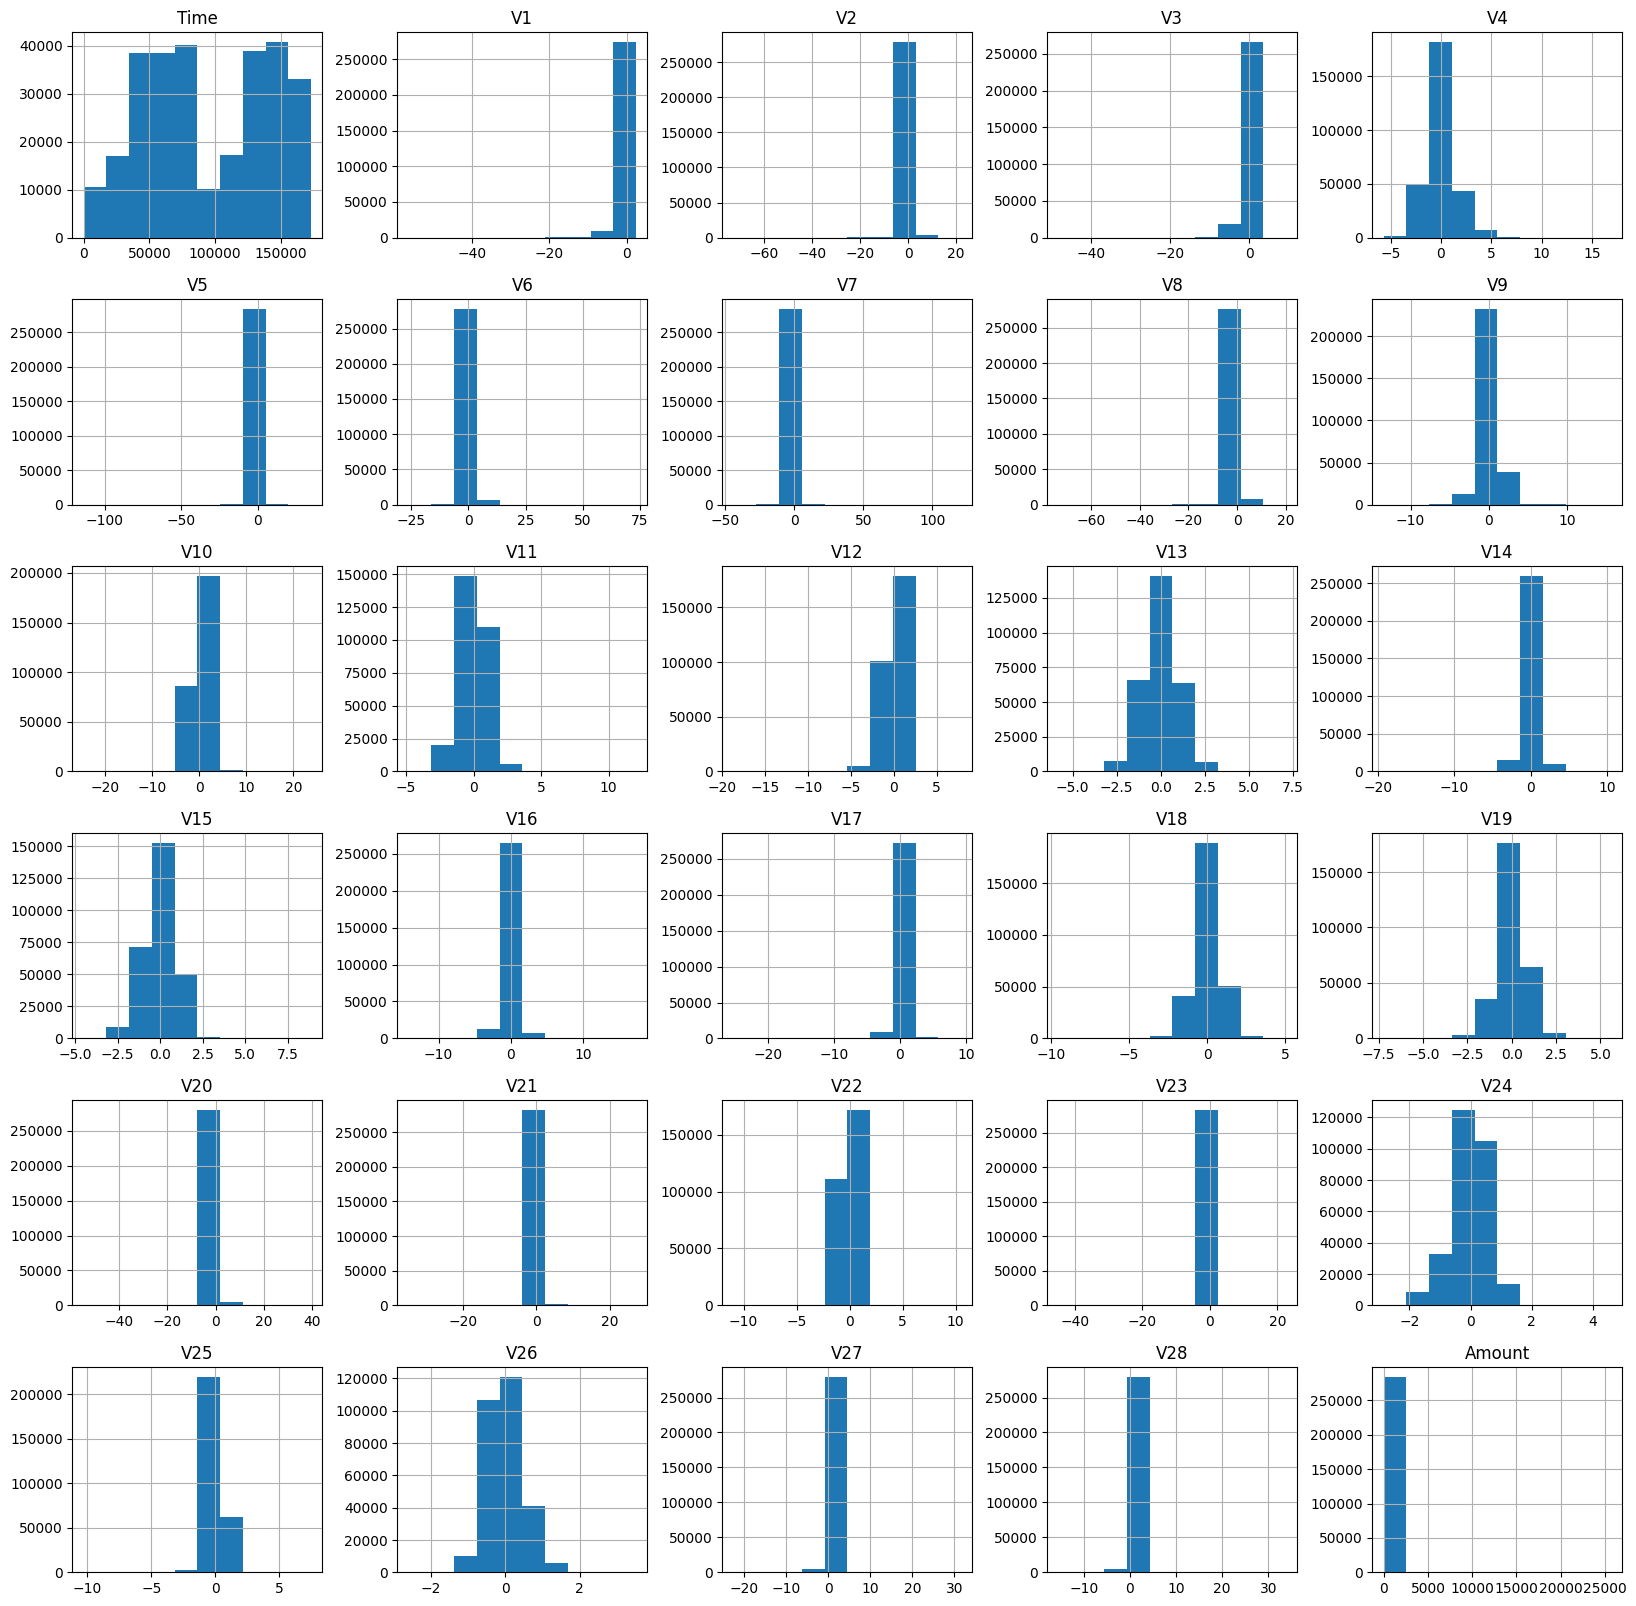

In [8]:
X_df.hist(figsize = (20, 20));

# Корреляция переменных

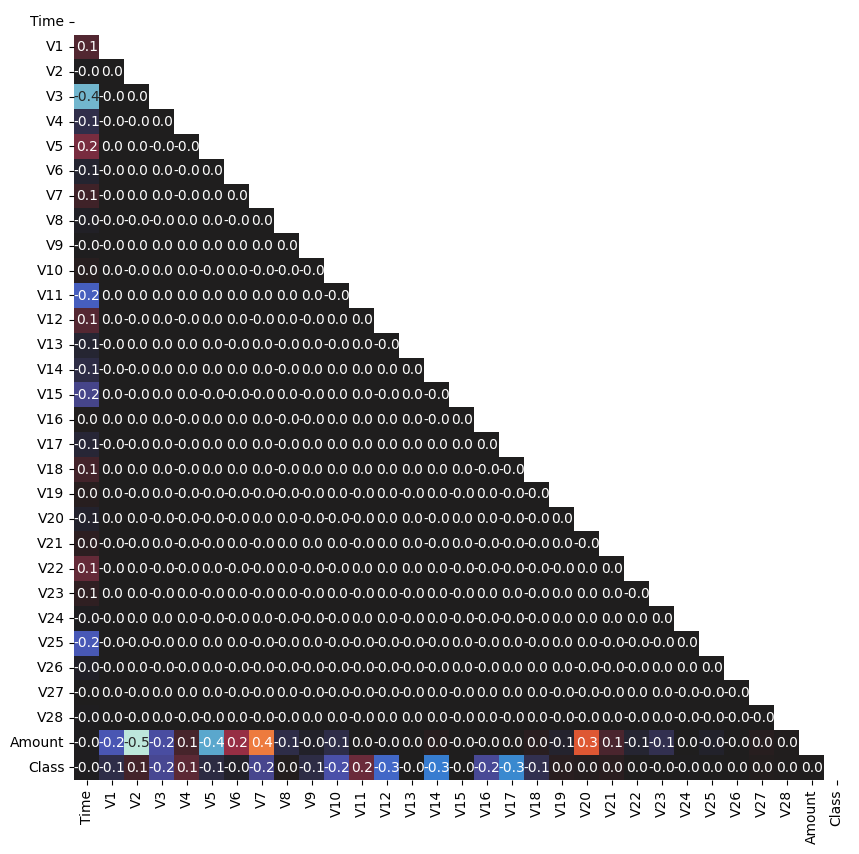

In [9]:
plt.figure(figsize = (10, 10))

corr_matrix = df.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k = -1).astype(np.bool))

sns.heatmap(lower, annot = True, fmt = '.1f', cbar = False, center = 0);

In [10]:
# Отбор переменных с высокой корреляцией

high_corr = [
    column for column in lower.columns if any((lower[column] > 0.6) | (lower[column] < -0.6))
]
high_corr

[]

# Визуализация выбросов

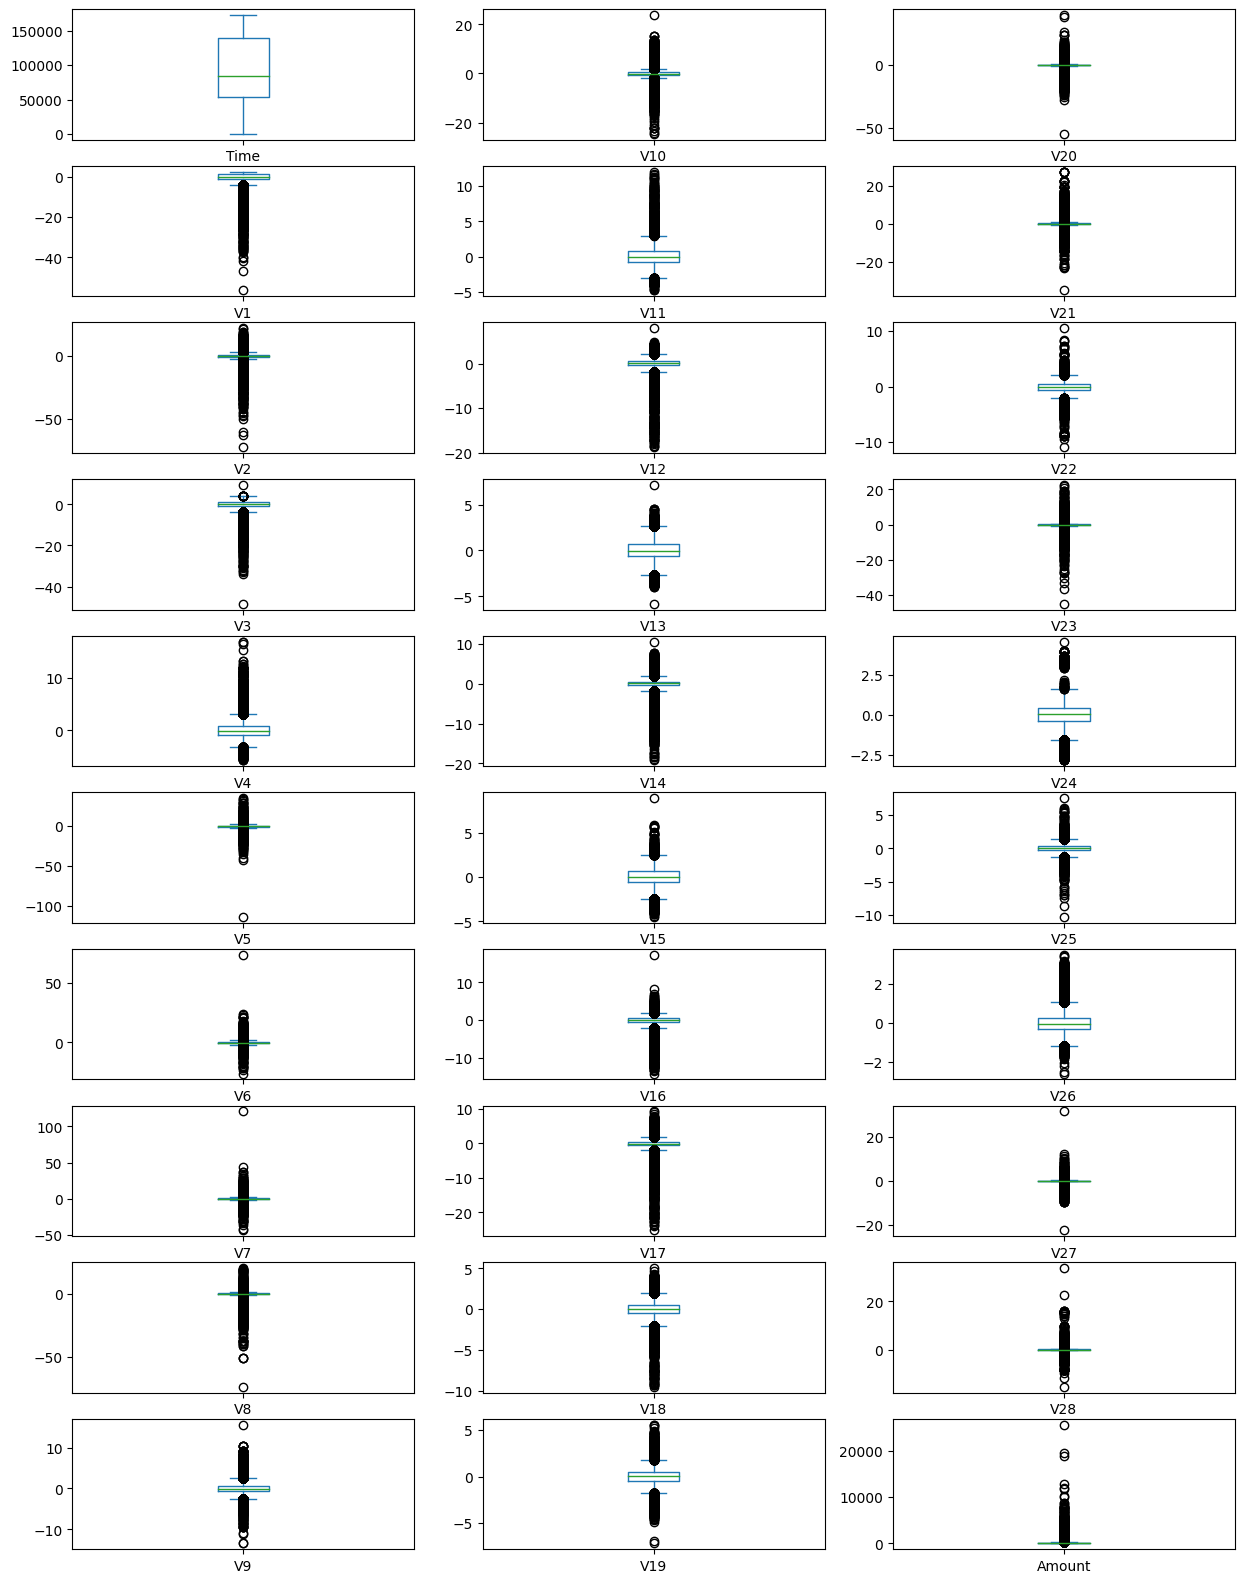

In [11]:
fig, axs = plt.subplots(ncols = 3, nrows = 10, figsize = (15, 20))

row = 0
col = 0

for ax, feature in enumerate(X_df):
    X_df[feature].plot.box(ax=axs[row, col])
    row += 1
    
    if row == 10:
        col += 1
        row = 0
        
plt.show()

Как видно из визуализация распределения данных, данные не имеют нормального распределения, поэтому вместо метода 3-х сигм, используем межквартильное отклонение

# Поиск аномалий (Межквартильное отклонение)

In [31]:
def outlier_iqr(data, col, threshold = 1.5):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bond = data[col].quantile(0.75) + (IQR * threshold)
    low_bond = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col] > up_bond, data[col] < low_bond], axis = 1).any(1)
    
    return anomalies, up_bond, low_bond

def anomalies_report(outliers):
    print('Общее кол-во аномалий: {}\nПроцент аномалий: {:.2f}%'.format(
        sum(outliers), 100*(sum(outliers)/len(outliers))))

In [14]:
def get_column_outliers(data, columns=None, function=outlier_iqr, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers

In [15]:
comparison_table, iqr_outliers = get_column_outliers(X_df)
anomalies_report(iqr_outliers)

Общее кол-во аномалий: 53336
Процент аномалий: 18.73%


In [16]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
Amount,291.860000,-209.095000,18941.0,6.650469
V27,0.576699,-0.556493,16524.0,5.801824
V20,1.167327,-1.246008,13385.0,4.699674
V28,0.471999,-0.446679,12573.0,4.414568
V8,1.935273,-1.816557,11285.0,3.962332
V23,1.076107,-1.090312,8135.0,2.856320
V21,1.430694,-1.472711,6934.0,2.434631
V6,3.899146,-4.268877,5389.0,1.892159
V2,5.010545,-4.805371,4453.0,1.563515
V10,3.421971,-3.503473,3208.0,1.126377


# Поиск аномалий (Distance-based)

In [22]:
# Класс поиска аномалий на основе расстояния

from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
        
    def __init__(self, metric = 'euclidean', percentile = 90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis = 0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric = self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric = self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        
        return predictions

In [23]:
# Шкалируем данные

scaler = StandardScaler()
X_scaled = pd.DataFrame(
    data = scaler.fit_transform(X_df),
    columns = X_df.columns
)

X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [25]:
# Снижаем размерность данных для визуализации

import umap

reducer = umap.UMAP()

X_umap = reducer.fit_transform(X_scaled)
X_umap.shape

(284807, 2)

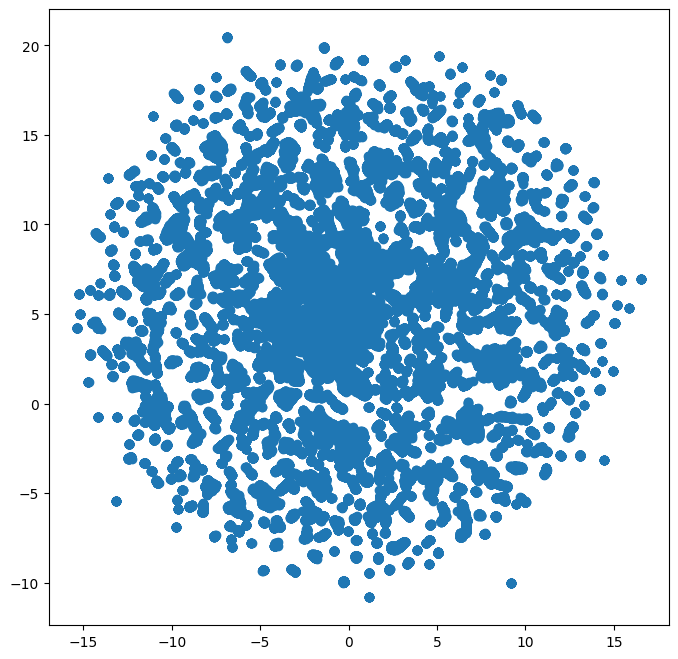

In [29]:
plt.figure(figsize = (8, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1]);

In [32]:
# Поиск аномалий при помощи алгоритма основанного на расстоянии

euclidian_model = DistanceOutliers(metric = 'euclidean', percentile = 95)
euclidian_model.fit(X_scaled)
euclidian_outliers = euclidian_model.predict(X_scaled)
anomalies_report(euclidian_outliers)

Общее кол-во аномалий: 14241
Процент аномалий: 5.00%


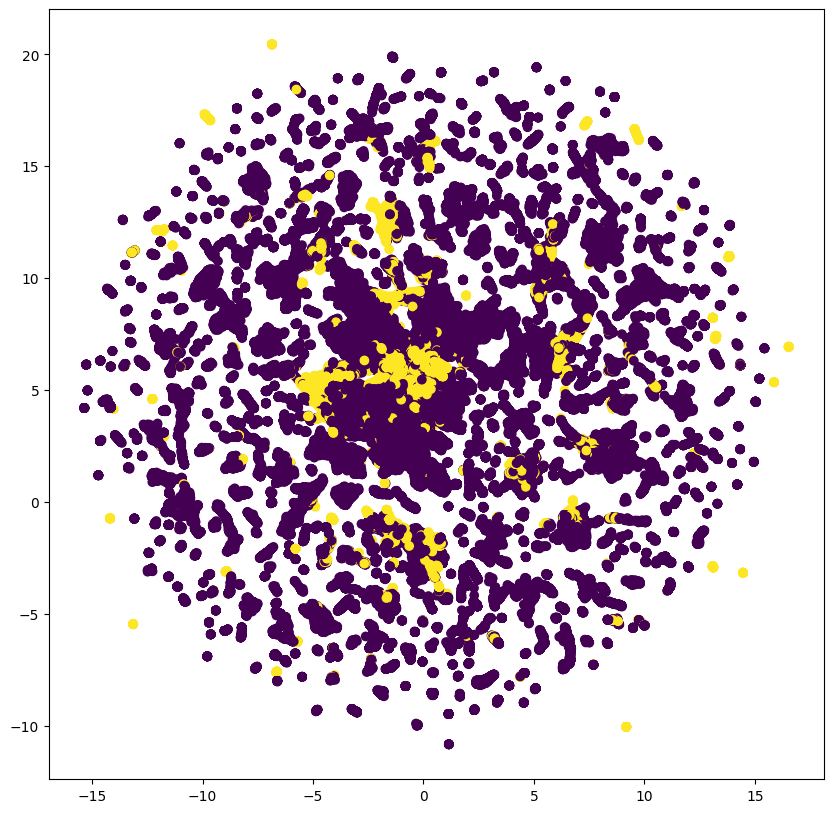

In [33]:
# Визуализация аномалий (Евклидовое расстояние)

plt.figure(figsize = (10, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c = euclidian_outliers);

# Поиск аномалий (DBSCAN)

In [40]:
from sklearn.cluster import DBSCAN

# для начала считаем все наблюдения аномальными
outlier_percentage = 1

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]
while outlier_percentage > 0.1:
    model = DBSCAN(eps = eps).fit(X_scaled)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels)) -1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент 'шума'
    outlier_percentage = sum(labels == 1) / len(labels)
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)
    
model = DBSCAN(eps)
model.fit(X_scaled)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [41]:
# подходящий epsilon

eps

2.6499999999999986

In [42]:
anomalies_report(density_outlier)

Общее кол-во аномалий: 25510
Процент аномалий: 8.96%


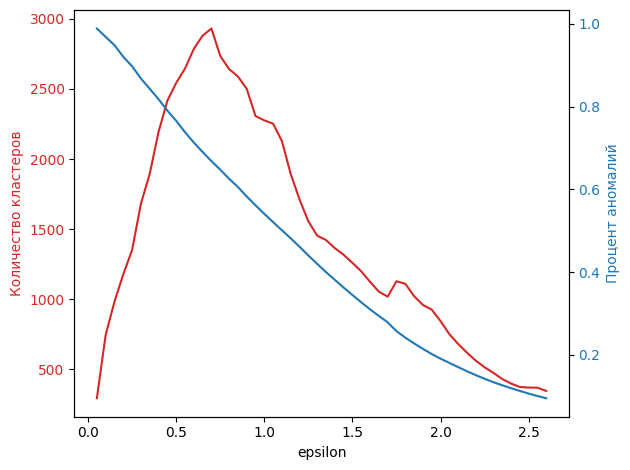

In [43]:
# График зависимости кол-ва кластеров от процента аномалий

iterations = eps_history[:-1]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('Количество кластеров', color = color)
ax1.plot(iterations, num_clusters, color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Процент аномалий', color = color)
ax2.plot(iterations, anomaly_percentage, color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()
plt.show()

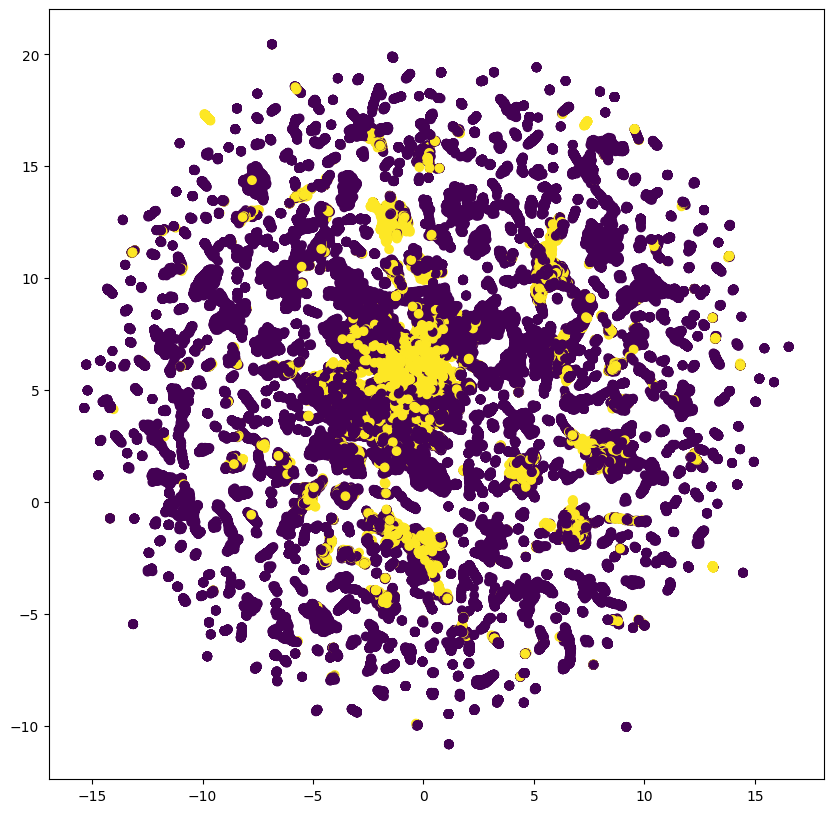

In [44]:
# Визуализация аномалий (алгоритм DBSCAN)

plt.figure(figsize = (10, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c = density_outlier);

#  Поиск аномалий (One Class SVM)

In [46]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu = 0.05, gamma = 'auto')
one_class_svm.fit(X_scaled)
svm_outliers = one_class_svm.predict(X_scaled)
svm_outliers - np.array([1 if label == -1 else 0 for label in svm_outliers])

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
anomalies_report(svm_outliers)

Общее кол-во аномалий: 256335
Процент аномалий: 90.00%


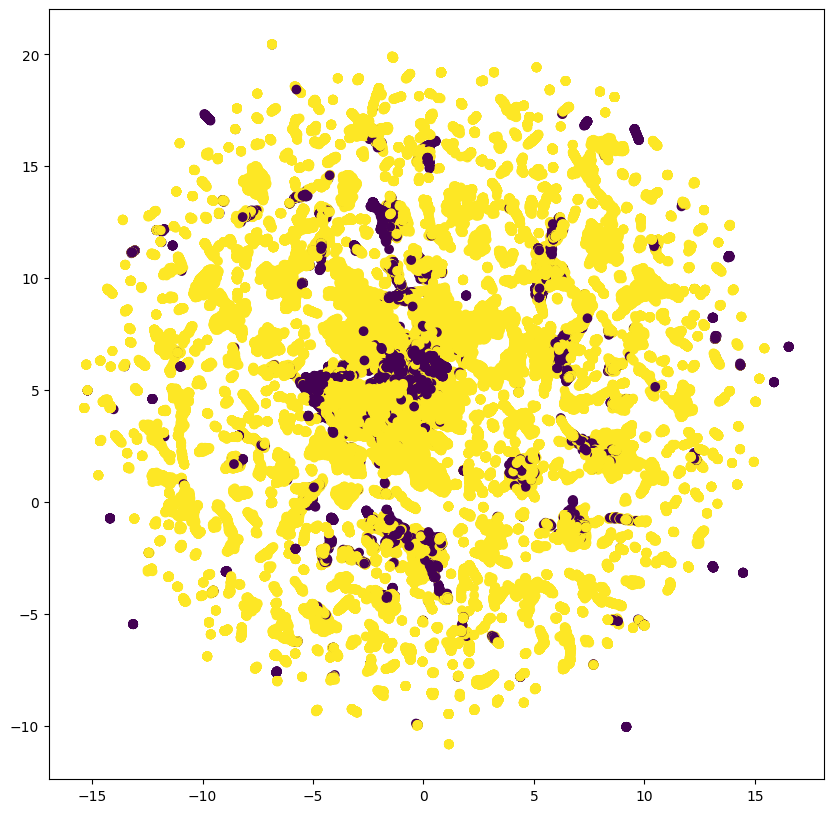

In [48]:
# Визуализация аномалий (алгоритм OneClassSVM)

plt.figure(figsize = (10, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c = svm_outliers);

# Поиск аномалий (Isolation Forest)

In [49]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators = 200, contamination = 0.05,
                                  max_features = 1, bootstrap = True)

isolation_forest.fit(X_scaled)
isolation_outliers = isolation_forest.predict(X_scaled)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [50]:
anomalies_report(isolation_outliers)

Общее кол-во аномалий: 14241
Процент аномалий: 5.00%


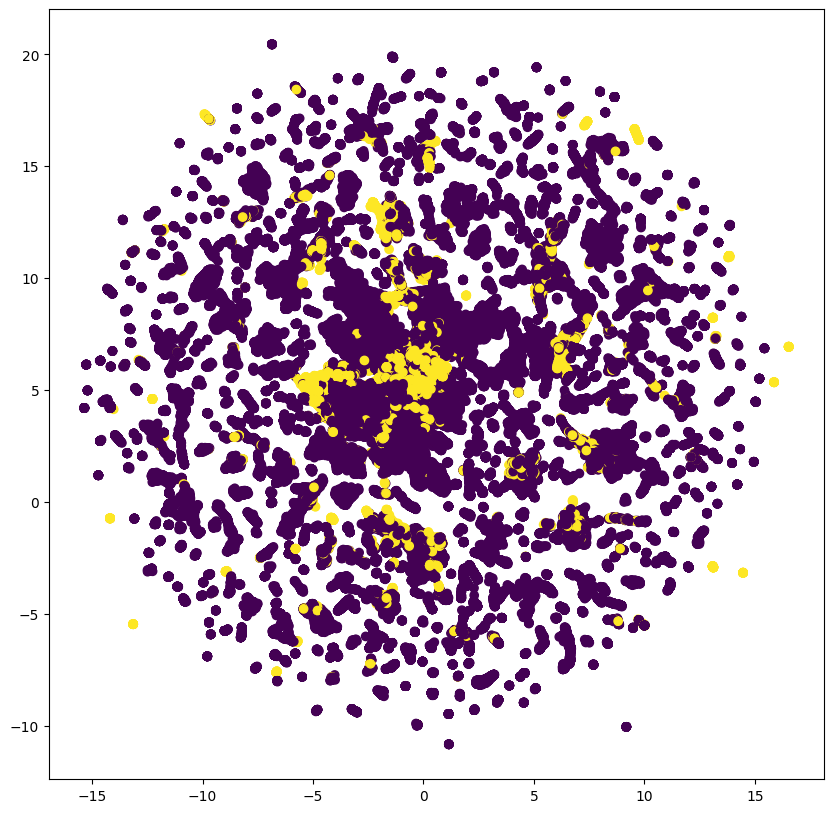

In [51]:
# Визуализация аномалий (алгоритм IsolationForest)

plt.figure(figsize = (10, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c = isolation_outliers);

# Оценка качества алгоритмов

In [58]:
# Качество кластеризации при помощи межквартильного отклонения

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_df, [0 if i == False else 1 for i in iqr_outliers]))


              precision    recall  f1-score   support

           0       1.00      0.81      0.90    284315
           1       0.01      0.92      0.02       492

    accuracy                           0.81    284807
   macro avg       0.50      0.87      0.46    284807
weighted avg       1.00      0.81      0.90    284807



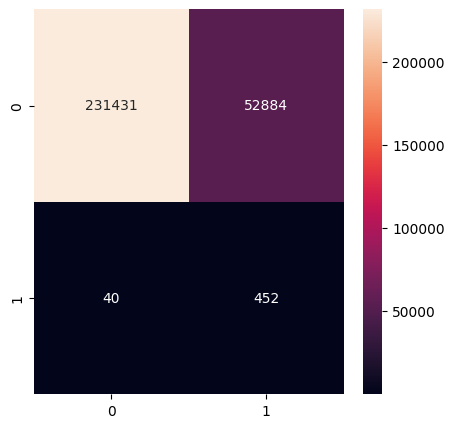

In [62]:
cm = confusion_matrix(y_df, [0 if i == False else 1 for i in iqr_outliers])
conf_matrix = pd.DataFrame(data = cm, index = [0, 1], columns = [0, 1])
plt.figure(figsize = (5, 5))
plt.xlabel
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = 'False');

In [63]:
y_df.to_frame().value_counts()

Class
0        284315
1           492
dtype: int64

In [66]:
# Качество кластеризации при помощи Distance-based

print(classification_report(y_df, [0 if i == False else 1 for i in euclidian_outliers]))


              precision    recall  f1-score   support

           0       1.00      0.95      0.98    284315
           1       0.03      0.88      0.06       492

    accuracy                           0.95    284807
   macro avg       0.52      0.91      0.52    284807
weighted avg       1.00      0.95      0.97    284807



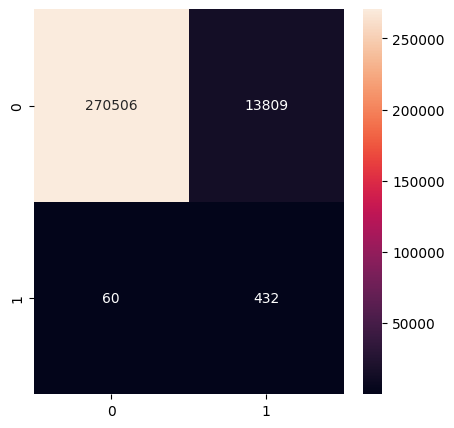

In [67]:
cm = confusion_matrix(y_df, [0 if i == False else 1 for i in euclidian_outliers])
conf_matrix = pd.DataFrame(data = cm, index = [0, 1], columns = [0, 1])
plt.figure(figsize = (5, 5))
plt.xlabel
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = 'False');

In [68]:
# Качество кластеризации при помощи DBSCAN

print(classification_report(y_df, [0 if i == False else 1 for i in density_outlier]))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    284315
           1       0.02      0.81      0.03       492

    accuracy                           0.91    284807
   macro avg       0.51      0.86      0.49    284807
weighted avg       1.00      0.91      0.95    284807



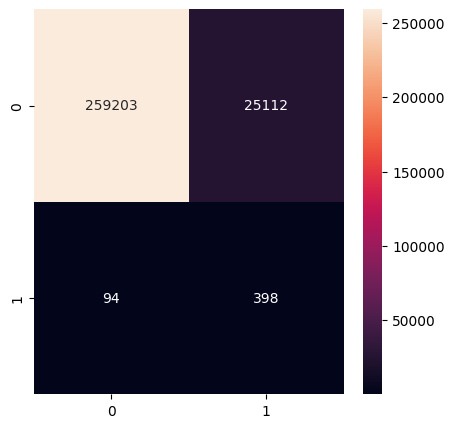

In [69]:
cm = confusion_matrix(y_df, [0 if i == False else 1 for i in density_outlier])
conf_matrix = pd.DataFrame(data = cm, index = [0, 1], columns = [0, 1])
plt.figure(figsize = (5, 5))
plt.xlabel
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = 'False');

In [70]:
# Качество кластеризации при помощи OneClassSVM

print(classification_report(y_df, [0 if i == False else 1 for i in svm_outliers]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    284315
           1       0.00      1.00      0.00       492

    accuracy                           0.00    284807
   macro avg       0.00      0.50      0.00    284807
weighted avg       0.00      0.00      0.00    284807



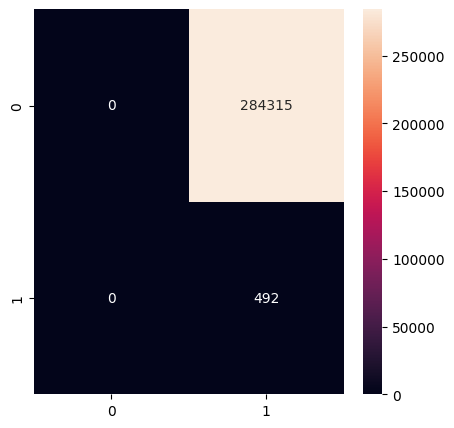

In [71]:
cm = confusion_matrix(y_df, [0 if i == False else 1 for i in svm_outliers])
conf_matrix = pd.DataFrame(data = cm, index = [0, 1], columns = [0, 1])
plt.figure(figsize = (5, 5))
plt.xlabel
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = 'False');

In [72]:
# Качество кластеризации при помощи IsolationForest

print(classification_report(y_df, [0 if i == False else 1 for i in isolation_outliers]))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.03      0.84      0.06       492

    accuracy                           0.95    284807
   macro avg       0.51      0.89      0.52    284807
weighted avg       1.00      0.95      0.97    284807



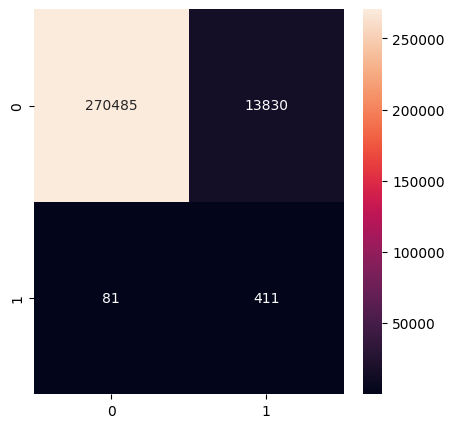

In [73]:
cm = confusion_matrix(y_df, [0 if i == False else 1 for i in isolation_outliers])
conf_matrix = pd.DataFrame(data = cm, index = [0, 1], columns = [0, 1])
plt.figure(figsize = (5, 5))
plt.xlabel
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = 'False');